In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
train_path = '../data/hy_round1_train_20200102'
test_path = '../data/hy_round1_testA_20200102'

In [3]:
train_df_list = []
for file_name in os.listdir(train_path):
    df = pd.read_csv(os.path.join(train_path, file_name))
    train_df_list.append(df)
    
test_df_list = []
for file_name in os.listdir(test_path):
    df = pd.read_csv(os.path.join(test_path, file_name))
    test_df_list.append(df)

In [4]:
train_df = pd.concat(train_df_list)
test_df = pd.concat(test_df_list)

In [5]:
train_df['time'] = pd.to_datetime(train_df['time'], format='%m%d %H:%M:%S')
test_df['time'] = pd.to_datetime(test_df['time'], format='%m%d %H:%M:%S')

In [6]:
all_df = pd.concat([train_df, test_df], sort=False)

In [7]:
all_df.shape

(3482016, 7)

In [8]:
tuo_df = all_df[all_df['type'] == '拖网']
wei_df = all_df[all_df['type'] == '围网']
ci_df = all_df[all_df['type'] == '刺网']

In [9]:
tuo_df.shape, wei_df.shape, ci_df.shape

((1681225, 7), (626607, 7), (391806, 7))

In [29]:
tuo_hours = []
for ship_id, group in tuo_df.groupby('渔船ID'):
    tuo_hours.append(group.loc[(group['y'].idxmax())]['time'].hour)
    
wei_hours = []
for ship_id, group in wei_df.groupby('渔船ID'):
    wei_hours.append(group.loc[(group['y'].idxmax())]['time'].hour)

ci_hours = []
for ship_id, group in ci_df.groupby('渔船ID'):
    ci_hours.append(group.loc[(group['y'].idxmax())]['time'].hour)

In [30]:
len(tuo_hours), len(wei_hours), len(ci_hours)

(4361, 1621, 1018)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

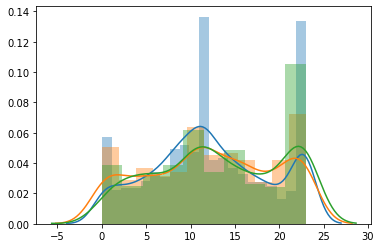

In [35]:
sns.distplot(tuo_hours)
sns.distplot(wei_hours)
sns.distplot(ci_hours)


In [38]:
tuo_far_time = []
for ship_id, group in tuo_df.groupby('渔船ID'):
    x = group['x'].values
    tuo_far_time.append(group[group['x'] >= np.min(x) + (np.max(x) - np.min(x)) * 0.9].shape[0] / group.shape[0])
    
wei_far_time = []
for ship_id, group in wei_df.groupby('渔船ID'):
    x = group['x'].values
    wei_far_time.append(group[group['x'] >= np.min(x) + (np.max(x) - np.min(x)) * 0.9].shape[0] / group.shape[0])
    
ci_far_time = []
for ship_id, group in ci_df.groupby('渔船ID'):
    x = group['x'].values
    ci_far_time.append(group[group['x'] >= np.min(x) + (np.max(x) - np.min(x)) * 0.9].shape[0] / group.shape[0])

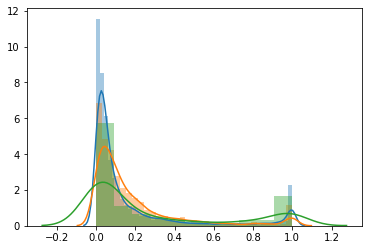

In [39]:
sns.distplot(tuo_far_time)
sns.distplot(wei_far_timeß)
sns.distplot(ci_far_time)

In [61]:
name = '方向'
tuo_far_time = []
for ship_id, group in tuo_df.groupby('渔船ID'):
    x = group[name].values
    tuo_far_time.append(np.mean(group[group[name] >= np.min(x) + (np.max(x) - np.min(x)) * 0.9]['time'].dt.hour))
    
wei_far_time = []
for ship_id, group in wei_df.groupby('渔船ID'):
    x = group[name].values
    wei_far_time.append(np.mean(group[group[name] >= np.min(x) + (np.max(x) - np.min(x)) * 0.9]['time'].dt.hour))

ci_far_time = []
for ship_id, group in ci_df.groupby('渔船ID'):
    x = group[name].values
    ci_far_time.append(np.mean(group[group[name] >= np.min(x) + (np.max(x) - np.min(x)) * 0.9]['time'].dt.hour))

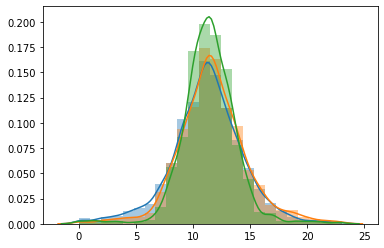

In [62]:
sns.distplot(tuo_far_time, bins=24)
sns.distplot(wei_far_time, bins=24)
sns.distplot(ci_far_time, bins=24)